## Penguins

<img src= https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguin.png width=600 >


#### Columns in the dataset
- species: penguin species (Chinstrap, Adélie, or Gentoo)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- bill_length_mm: bill length (mm)
- bill_length_mm: bill depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- Sex: penguin sex

<img src= https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguin2.png width=600 >


In [1]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv

--2024-05-08 11:01:50--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 3.5.245.156, 52.95.143.30, 52.95.142.26, ...
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|3.5.245.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15134 (15K) [text/csv]
Saving to: ‘penguins.csv’

penguins.csv        100%[===================>]  14.78K  --.-KB/s    in 0s      

2024-05-08 11:01:51 (101 MB/s) - ‘penguins.csv’ saved [15134/15134]



In [2]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv"

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(path)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
#checking number of null values in the data
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
df['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

In [8]:
df['island'].value_counts(normalize=True)

island
Biscoe       0.489489
Dream        0.369369
Torgersen    0.141141
Name: proportion, dtype: float64

<Axes: ylabel='species'>

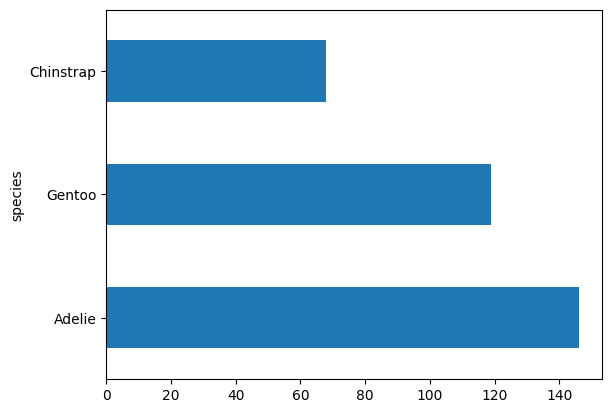

In [9]:
df['species'].value_counts().plot(kind='barh')

In [10]:
df['species'].value_counts(normalize=True)

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64

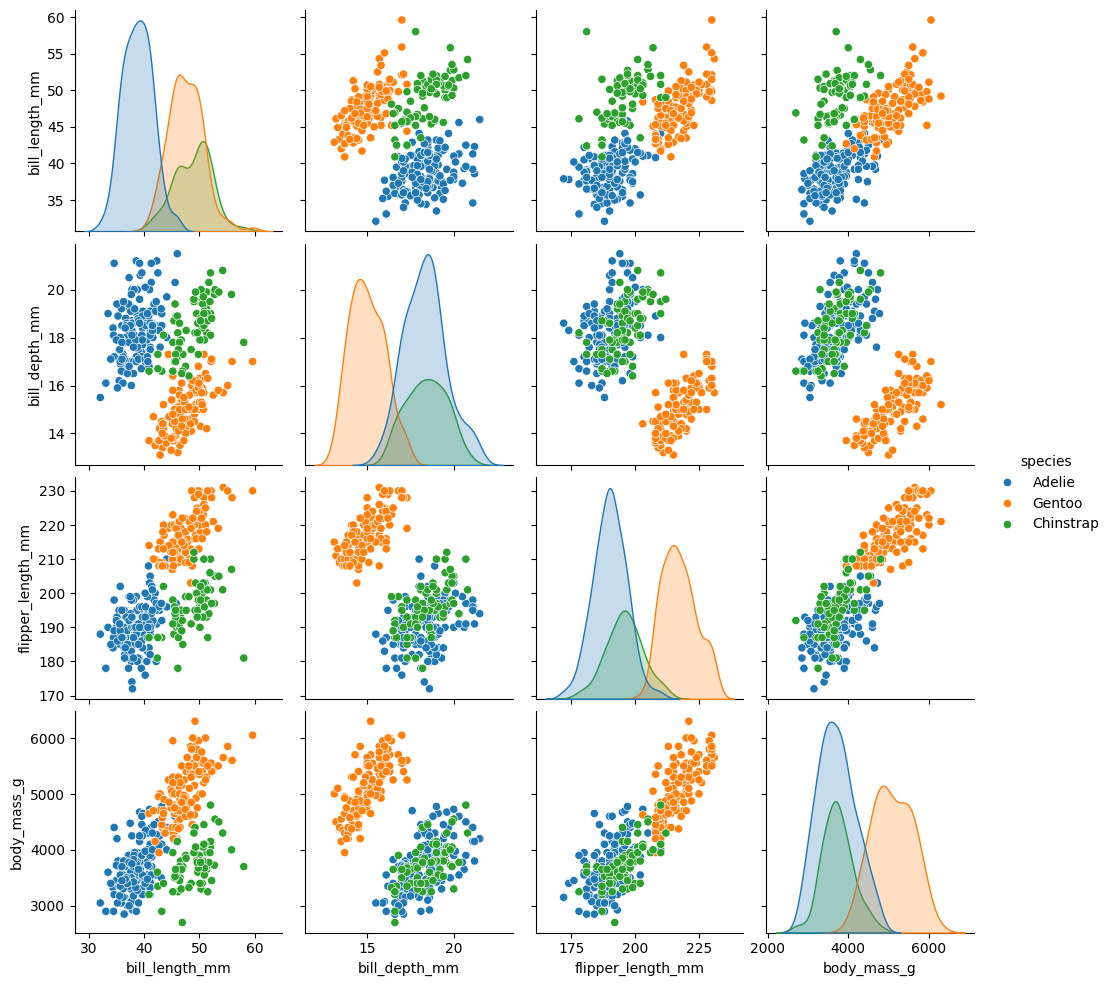

In [11]:
sns.pairplot(df,hue='species')

In [13]:
corrmat = df.corr(numeric_only=True)
corrmat

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


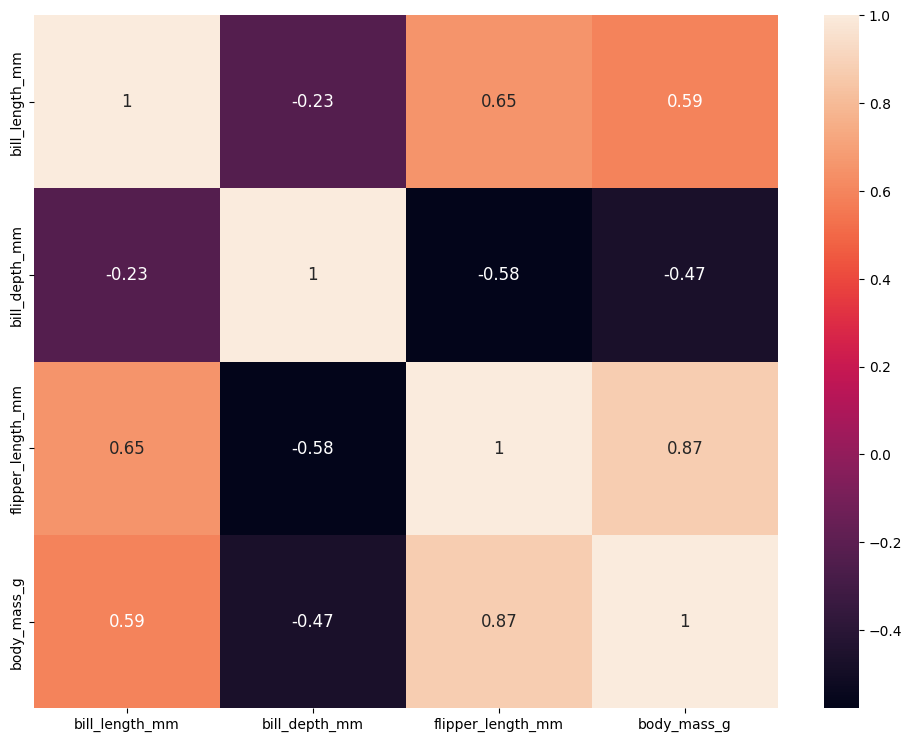

In [14]:
plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});

<Axes: xlabel='species', ylabel='bill_length_mm'>

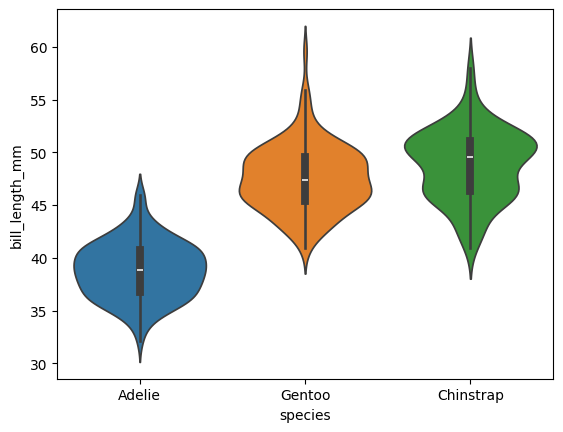

In [18]:
sns.violinplot(data=df, x="species", y="bill_length_mm",hue="species")

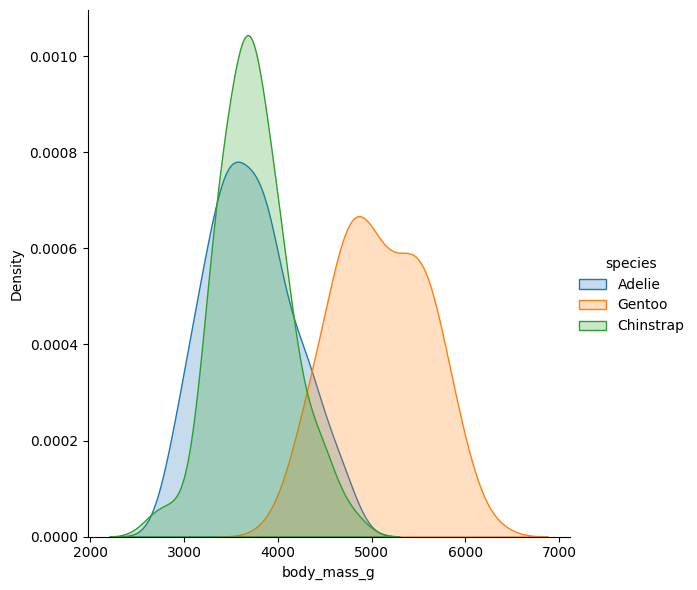

In [19]:
sns.FacetGrid(df, hue="species", height=6,).map(sns.kdeplot, "body_mass_g",fill=True).add_legend()

Text(0, 0.5, 'Body Mass')

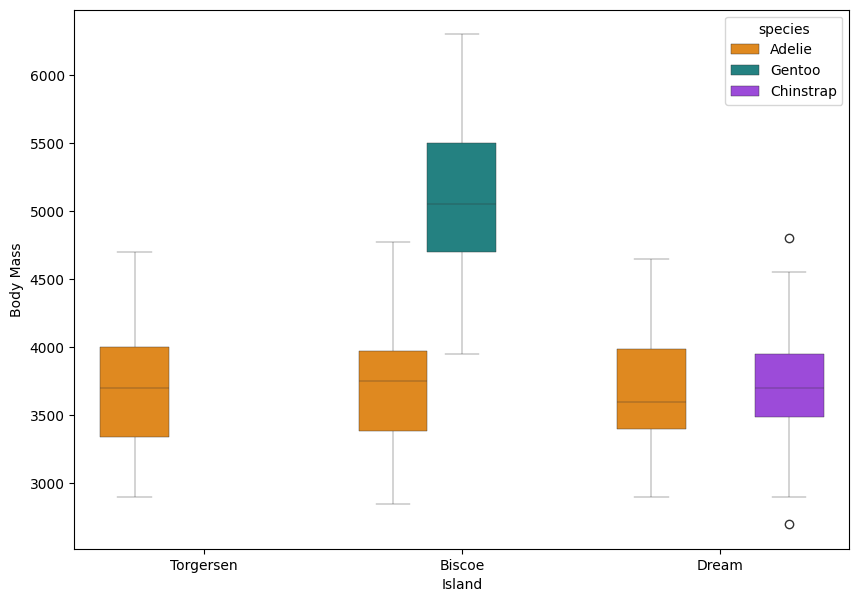

In [20]:
plt.figure(figsize = [10,7])
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = df,
            palette=['#FF8C00','#159090','#A034F0'],
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')

### Advanced

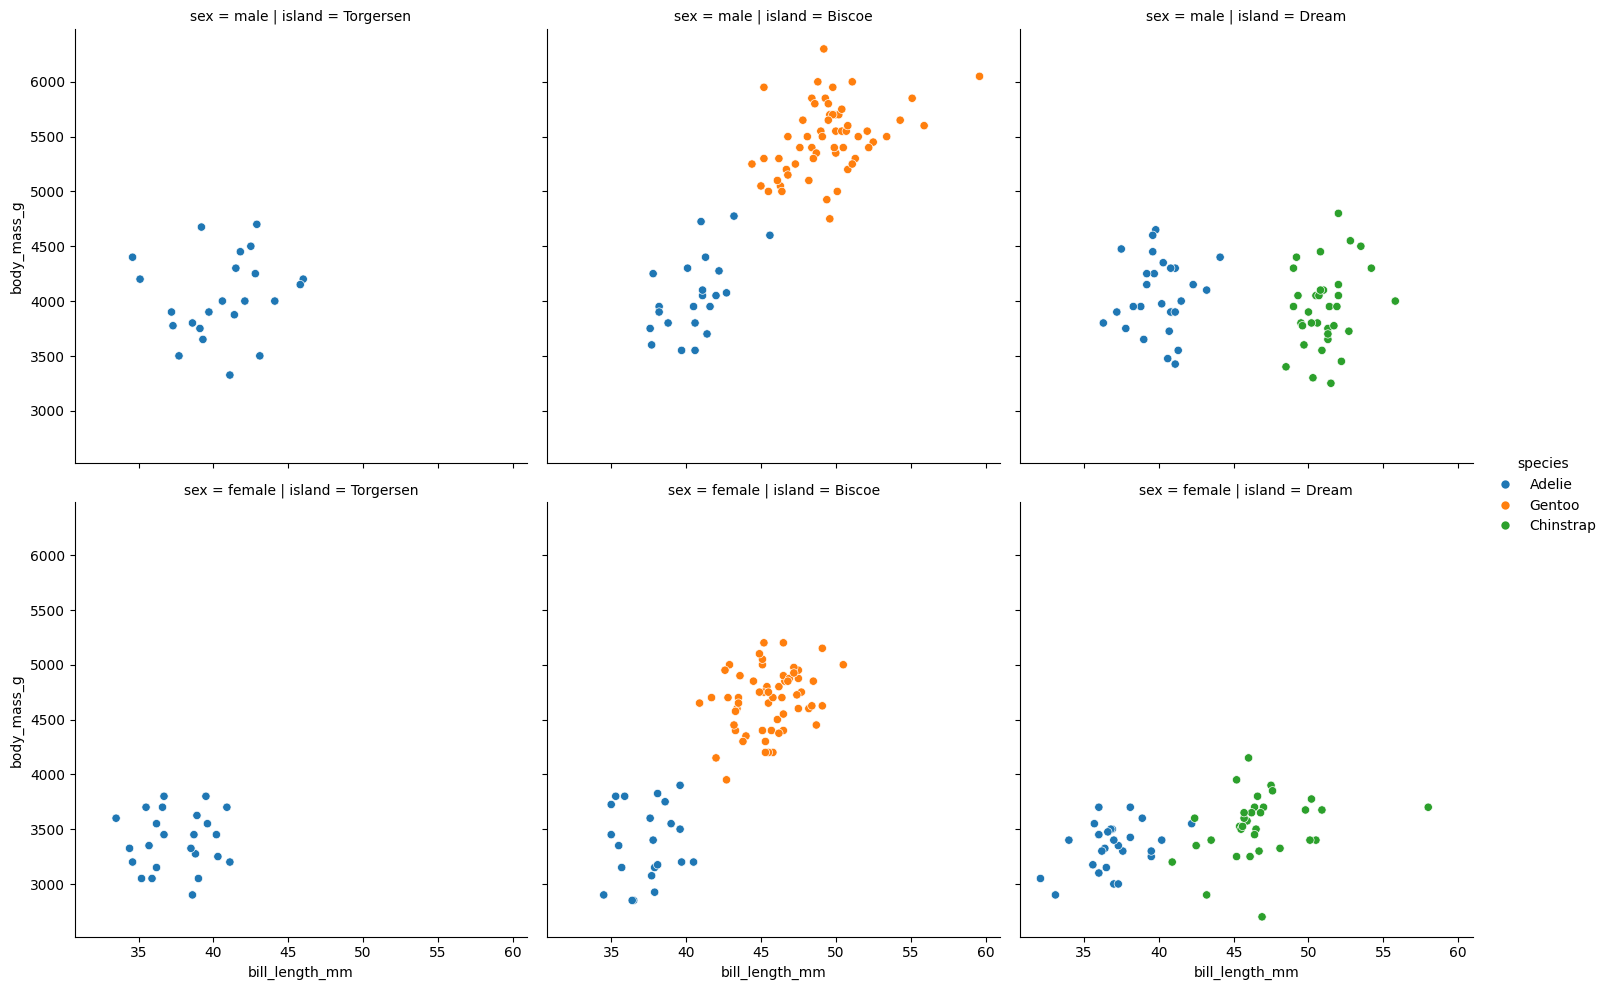

In [21]:
sns.relplot(x="bill_length_mm", y="body_mass_g", hue="species",
                col="island", row="sex", data=df);

In [22]:
df = pd.get_dummies(df,columns = ['island','sex'],drop_first=True,dtype=int)
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,Adelie,39.1,18.7,181,3750,0,1,1
1,Adelie,39.5,17.4,186,3800,0,1,0
2,Adelie,40.3,18.0,195,3250,0,1,0
3,Adelie,36.7,19.3,193,3450,0,1,0
4,Adelie,39.3,20.6,190,3650,0,1,1
...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207,4000,1,0,1
329,Chinstrap,43.5,18.1,202,3400,1,0,0
330,Chinstrap,49.6,18.2,193,3775,1,0,1
331,Chinstrap,50.8,19.0,210,4100,1,0,1


In [23]:
X = df.drop(columns='species')
y = df['species']

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=667
                                                    )

In [25]:
#Train the model with Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train) #Training the model

LogisticRegression()

In [26]:
model.intercept_ # un'intercepta per ogni classe

array([ 0.0253033 , -0.00754504, -0.01775826])

In [27]:
model.coef_ # un Beta regress per ogni variabiel di input

array([[-7.50888096e-01,  1.05936365e+00,  7.14933306e-02,
         6.20249297e-04, -2.26995647e-02,  1.09556555e-01,
         1.09257981e-01],
       [ 1.26482858e+00,  4.46744106e-03, -1.41199863e-01,
        -6.96389914e-03,  1.25139270e-01, -5.47892270e-02,
         4.75768175e-03],
       [-5.13940486e-01, -1.06383109e+00,  6.97065323e-02,
         6.34364984e-03, -1.02439705e-01, -5.47673278e-02,
        -1.14015663e-01]])

In [28]:
model.predict_proba(X_test)

array([[9.95860357e-01, 1.71325257e-09, 4.13964096e-03],
       [2.49146507e-01, 7.50840317e-01, 1.31762351e-05],
       [3.77434754e-04, 1.08151351e-05, 9.99611750e-01],
       [9.92838777e-01, 5.77780825e-03, 1.38341492e-03],
       [2.00683917e-03, 4.22717751e-08, 9.97993119e-01],
       [1.95532702e-04, 3.29860209e-07, 9.99804137e-01],
       [9.99999030e-01, 2.06212987e-08, 9.49109117e-07],
       [3.16223636e-04, 1.17278879e-05, 9.99672048e-01],
       [6.67441630e-01, 3.32127391e-01, 4.30979527e-04],
       [1.10844697e-05, 9.99988838e-01, 7.73169875e-08],
       [1.97172682e-05, 9.99980258e-01, 2.47673899e-08],
       [9.99789526e-01, 3.34208169e-06, 2.07131778e-04],
       [1.10034448e-03, 6.05210701e-06, 9.98893603e-01],
       [3.66746107e-03, 4.54665187e-07, 9.96332084e-01],
       [9.98546060e-01, 1.25329696e-03, 2.00642865e-04],
       [7.56150656e-06, 9.99992435e-01, 3.08157500e-09],
       [9.99178474e-01, 6.10563560e-04, 2.10962643e-04],
       [7.69920480e-04, 5.63180

In [29]:
#Test the model
y_pred  = model.predict(X_test)
print(y_pred )# printing predictions

['Adelie' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie'
 'Gentoo' 'Adelie' 'Chinstrap' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo'
 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap'
 'Adelie' 'Adelie' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Gentoo'
 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo'
 'Adelie' 'Chinstrap' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo'
 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo']


In [30]:
confronto = pd.DataFrame(list(zip(y_pred,y_test)), columns=['predetti','reali'])
confronto

,predetti,reali
0,Adelie,Adelie
1,Chinstrap,Adelie
2,Gentoo,Gentoo
3,Adelie,Adelie
4,Gentoo,Gentoo
...,...,...
79,Chinstrap,Chinstrap
80,Adelie,Adelie
81,Adelie,Adelie
82,Adelie,Adelie


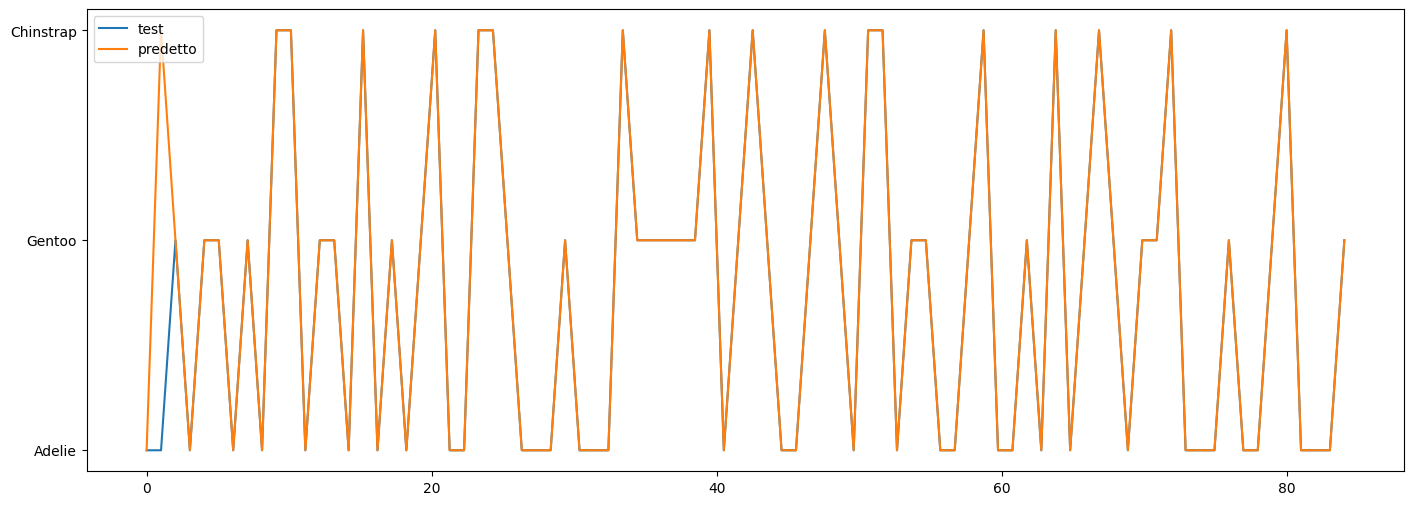

In [45]:
import numpy as np
length = y_pred.shape[0] # 30
x = np.linspace(0,length,length)


plt.figure(figsize=(17,6))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [34]:
X[0:1]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181,3750,0,1,1


In [36]:
model.predict([[39.1,18.7,181,3750,0,1,1]])[0]

'Adelie'

In [37]:
model.score(X_train,y_train)

0.9879518072289156

In [38]:
model.score(X_test,y_test)

0.9880952380952381

In [40]:
from sklearn.metrics import accuracy_score # è la stessa cosa model.score(X_test,y_test)

acc = accuracy_score(y_test,y_pred)
print(f"L'accuracy totale è: {round(acc,2)*100}%")

L'accuracy totale è: 99.0%


## La cross Validation
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/fav/cross_val.png" width=800 >


In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
scores

array([0.97014925, 0.98507463, 0.97014925, 1.        , 0.98484848])

In [42]:
acc_cv = np.mean(scores).round(3)
acc_cv

0.982

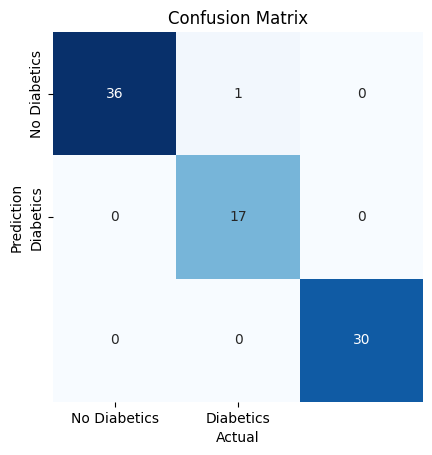

In [43]:
from sklearn.metrics import confusion_matrix

#labels = y_test.sort_values().drop_duplicates().to_list()
labels = ['No Diabetics','Diabetics']

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , square=True, annot=True, cbar=False,cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Prediction');

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        37
   Chinstrap       0.94      1.00      0.97        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

